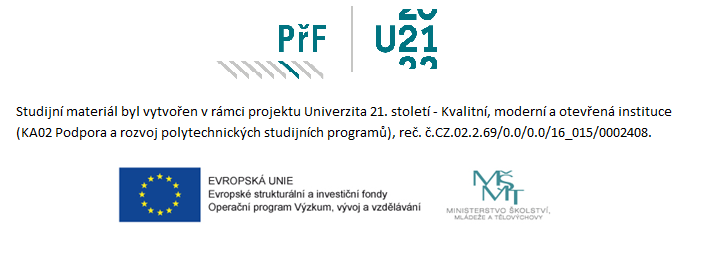

# Úvod
Vytvořená opora si klade za cíl seznámit studenty s praktickým využitím algoritmů strojového učení. Nevyhýbá se však ani vysvětlení matematického pozadí algoritmů.

Opora se skládá z několika sheetů, tak aby pokryla sylabus předmětu *Úvod do strojového učení*. Některé sheety v sobě zahrnují více témat, neboť mi přišlo názorné a užitečné to takto poskládat dohromady. Čtenář tak získá komplexnější pohled na danou problematiku. Doporučuji čtenáři aby s oporou pracoval po pořadě, tedy postupoval dle čísel daných sheetů.

V textu  opory jsou obsaženy zdrojové kódy, **doporučuji** čtenáři aby se je vyzkoušel a hlavně promyslel. Jedná se buď o použití knihovny [sklearn](https://scikit-learn.org/stable/index.html) (vyzkoušet), nebo o
implementaci *from scratch* daných algoritmů (promyslet). Jako optimální pro vlastní experimenty shledávám běhové prostředí *Google Colab*.

Zároveň v každém z sheetů je několik samostatných úloh k řešení.

V závěru každého sheetu je doporučená literatura pro další studium.


**Ukončení předmětu**

Zápočet získáte za odevzdání a předvedení nejméně 80% vyřešených úloh z textu. Zkouška je ústní a je zaměřena na porozumění principům algoritmů.

Jako varianta získání zápočtu se jeví aplikace metod na nějaký z problémů praxe, to však je nutné si dohodnout s vyučujícím.

# Strojové učení
Strojové učení (*Machine Learning* - ML) je skupina  algoritmů a technik, kde se na základě dostupných dat sestaví model daného systému a tento model se používá pro další předpověď budoucího chování systému, či pro rozhodování o akcích spojených s daným chováním systému.

**Poznámka:**
Různé zdroje podávají různé definice. Důležitá je ale závislost na datech.

Název strojové učení říká, že dané algoritmy umožní stroji **učit se**. Co to však znaméná, že se stroj učí? Někdy se uvažuje o strojovém učení jako o podmnožině umělé inteligence (*Artificial Inteligence* - AI), jindy ne. AI přepodkládá "uvědomnění", zatímco ML jsou spíše pasivní algoritmy.
Učením tedy rozumíme to, že stroj na základě dat mění svůj vnitřní stav tak, aby byl schopen reagovat na změny okolí. Na obrázku níže je zanesen vztah mezi AI a ML.

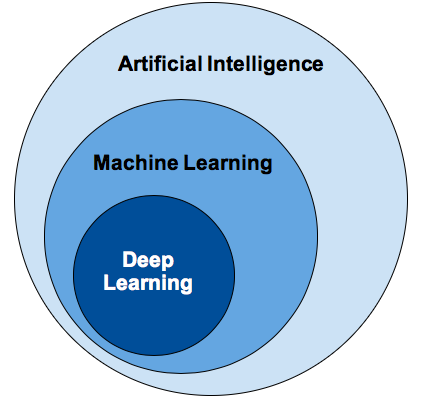

Zdroj obrázku <https://qph.cf2.quoracdn.net/main-qimg-3ba715eff1ae5c0964e9465d5db12d99>

Strojové učení úzce souvisí s dalšímy obory:


*   Optimalizace - celou řadu úloh ML lze popsat jako optimalizační problém
*   Statistika - algoritmy ML často vycházejí z aplikace statistických principů
*   Data mining - zaměřen na získávání informací z dat. Používá často některé z algoritmů ML, nicméně zde dané algoritmy používá člověk, aby získal informace z dat.




## Některé úlohy ML

Uveďme si zde nejčastější úlohy ML:


*   Klasifikace - rozdělení dat (datových bodů) do více tříd, např. na základě tělesných parametrů jedince rozhodnout zda je člověk obézní (třídy obézní, normální), či ne. Počet a druh tříd je předem známý.
*   Regrese - výpočet číselné hodnoty na základě vstupních parametrů, např. výpočet ceny nemovitosti na základě polohy, plochy bytu a dalších parametrů.
*   Shlukování (*clustering*) - rozdělení datových bodů do shluků, zde na rozdíl od klasifikace vůbec o daných třídách nevíme, zda existují. Cílem je právě ověřit, zda v datech jsou nějaké podobnosti.
*   Detekce anomálií - hledání výjimečných událostí v datech, příkladem může být detekce neoprávněných výběrů, či plateb kartou.
*   Redukce dimensionality - reálné úlohy obsahují obvykle velké množství dat, z nichž jen část je pro sestavení modelu podstatná, ostatní představují balast. Cílem je vybrat ze vstupní množiny dat pouze jistou podmnožinu tak, aby obsahovala potencionálně relevantní data.

Na obrázku níže je schematicky znázorněn rozdíl mezi nejčastějšími úlohami ML.




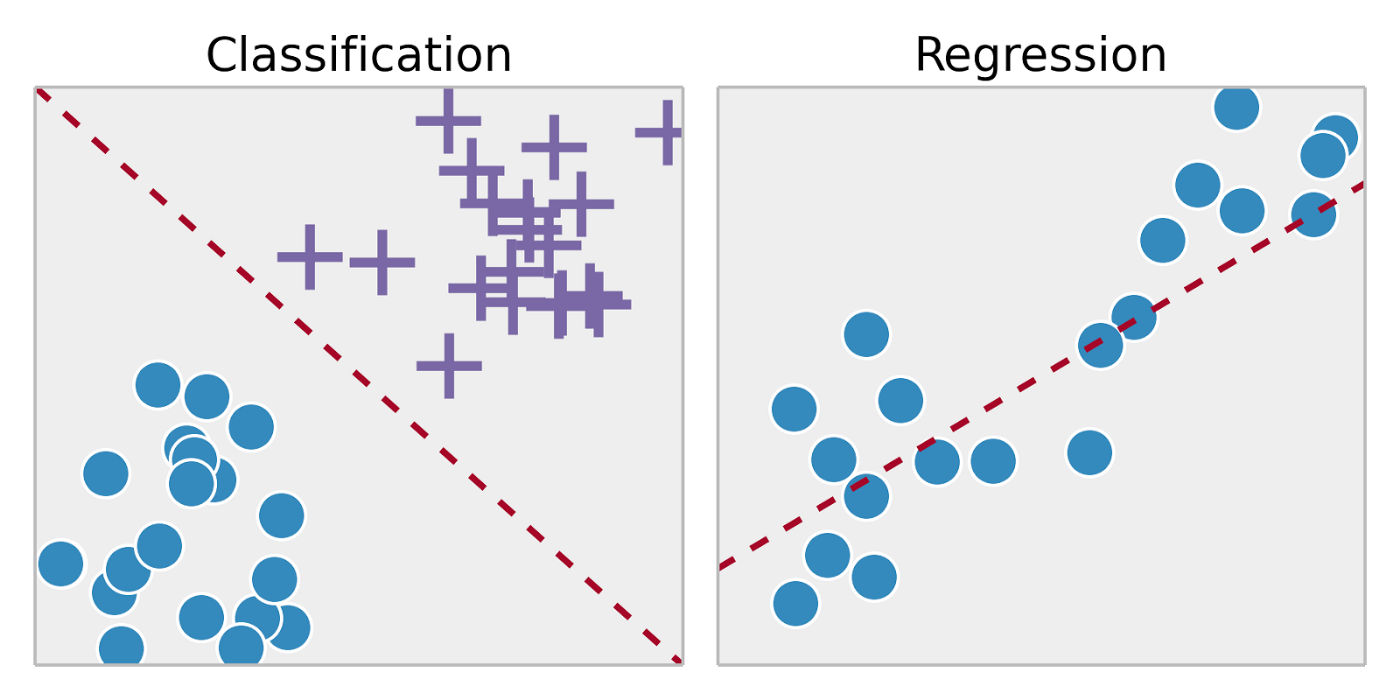

Zdroj obrázku https://miro.medium.com/max/1400/1*ASYpFfDh7XnreU-ygqXonw.png

## Praktické ukázky a ilustrace úloh

Nejprve si vygenerujeme náhodná data. Budeme uvažovat jedince, jejichž váha a výška je dána gaussovským rozdělením:
\begin{equation*}
\rho(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}}.
\end{equation*}

Každý jedinec je v podstatě bod v tzv. *příznakovém prostoru* (*feature space*). V našem případu jsou jednotlivé dimenze váha a výška. Používáme ještě body mass index (BMI), ale ten přímo pro rozhodování nepoužíváme.


In [1]:
# generování dat
import numpy as np
import pandas as pd
from numpy.random import randn

N = 1000  # počet datových bodů


# pomocí gausovského rozdělení nagenerujeme body v prostoru váha-výška
# generování váhy v kg
def generuj_vahu(vaha_prumer=80, vaha_sigma=12, kolik=100):
    vaha = vaha_prumer + randn(kolik) * vaha_sigma
    vaha[vaha < vaha_prumer - 4 * vaha_sigma] = (
        vaha_prumer - 4 * vaha_sigma
    )  # orezani nepravdepodobnych hodnot - podvaha
    vaha[vaha > vaha_prumer + 4 * vaha_sigma] = (
        vaha_prumer + 4 * vaha_sigma
    )  # orezani nepravdepodobnych hodnot - nadpodvaha
    return vaha


# generování výšky v cm
def generuj_vysku(vyska_prumer=180, vyska_sigma=15, kolik=100):
    vyska = vyska_prumer + randn(kolik) * vyska_sigma
    vyska[vyska < vyska_prumer - 4 * vyska_sigma] = vyska_prumer - 4 * vyska_sigma
    vyska[vyska > vyska_prumer + 4 * vyska_sigma] = vyska_prumer + 4 * vyska_sigma
    return vyska


# spocteni body mass indexu BMI
vaha = generuj_vahu(kolik=N)
vyska = generuj_vysku(kolik=N)
bmi = vaha / (vyska / 100) ** 2
data = {"vyska": vyska, "vaha": vaha, "bmi": bmi}
df = pd.DataFrame(data)  #
df.to_csv("data_lide.csv", index=False)
df.head(10)

,vyska,vaha,bmi
0,181.111140,62.820857,19.151973
1,176.387278,73.786709,23.716119
2,159.387768,84.234253,33.157269
3,176.437925,69.872816,22.445246
4,165.998675,84.312745,30.597362
5,185.902942,76.004563,21.992122
6,161.590533,68.992012,26.422079
7,187.215441,71.288221,20.339227
8,187.176561,65.057028,18.569119
9,161.050935,61.887066,23.860162


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


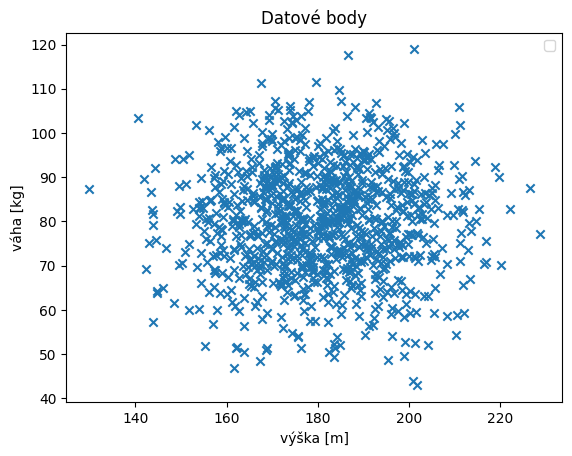

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data['vyska'], data['vaha'], marker = 'x')
plt.title("Datové body")
plt.xlabel('výška [m]')
plt.ylabel('váha [kg]')
plt.legend()
plt.show()

### Regrese

Budeme na základě váhy a výšky predikovat BMI.
Vzoreček je dán [BMI](https://cs.wikipedia.org/wiki/Index_t%C4%9Blesn%C3%A9_hmotnosti):
\begin{equation}
BMI =  \frac{váha}{{výška}^2} \; [kg/m^2]
\end{equation}.

Budeme předpokládát, že nevíme že BMI lze spočítat dle výše uvedeného vzorce.
Ukážeme si dva jednoduché algoritmy, lineární regresi a predikci pomocí rozhodovacích stromů. Nejprve si data rozdělíme na dvě části, viz dále a na jedné části model naučíme a na druhé ověříme jeho úspěšnost.

10


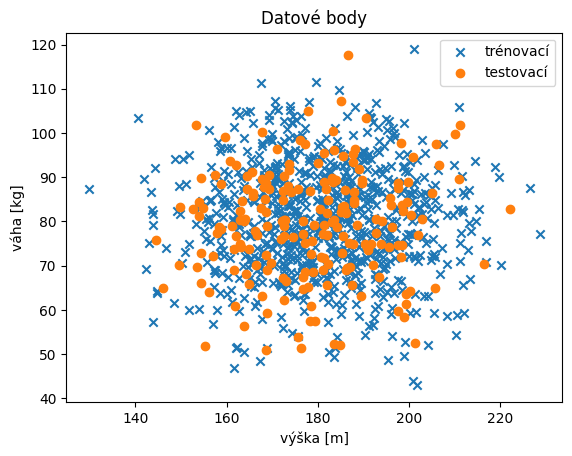

            vyska        vaha         bmi
count  800.000000  800.000000  800.000000
mean   180.981932   80.351897   25.102034
std     15.561455   12.270131    5.941110
min    129.772895   42.912742   10.556945
25%    170.493953   71.896803   20.860544
50%    181.286087   80.581765   24.448884
75%    191.799203   88.785109   28.479421
max    228.600850  118.897613   52.249253
            vyska        vaha         bmi
count  200.000000  200.000000  200.000000
mean   178.768566   79.343172   25.308406
std     15.050216   12.090155    5.535294
min    144.405735   50.817175   13.003362
25%    167.746105   71.398763   21.236411
50%    178.801055   80.037326   24.703499
75%    187.924228   87.464526   29.297755
max    222.099962  117.625235   43.316585


In [3]:
%matplotlib inline
promichano_index = df.index.to_list()
np.random.shuffle(promichano_index)

trenovaci_data_velikost = int(len(df)*0.80) # vezmeme 80 % pro nauceni modelu
print(df.index[10])
trenovaci_data = df.filter(promichano_index[:trenovaci_data_velikost], axis = 0) # vem nahodne indexy
testovaci_data = df.filter(promichano_index[trenovaci_data_velikost:], axis = 0) # vem nahodne indexy

plt.scatter(trenovaci_data['vyska'], trenovaci_data['vaha'], marker = 'x', label='trénovací')
plt.scatter(testovaci_data['vyska'], testovaci_data['vaha'], marker = 'o', label='testovací')
plt.title("Datové body")
plt.xlabel('výška [m]')
plt.ylabel('váha [kg]')
plt.legend()
plt.show()

# statisticke ukazatele
print(trenovaci_data.describe())
print(testovaci_data.describe())

#### Použití lineární regrese

Budeme predikovat hodnotu BMI pomocí následujícícho modelu:
\begin{equation}
y \approx \alpha_0 + \alpha_1*vyska+\alpha_2*vaha.
\end{equation}
Toto lze zapsat jako soustavu rovnic ve tvaru:
\begin{equation}
\hat{y} = X ⋅(\alpha_0 , \alpha_1,\alpha_2)^T,
\end{equation}
kde řádky matice $X$ jsou tvořeny hodnotami jednotlivých záznamů a v prvním sloupci je 1. Hodnota $\hat{y}$ je aproximací vektoru $y$.

Nejlepší hodnotu $\hat{y}$ ve smyslu [metody nejmenších čtverců](https://cs.wikipedia.org/wiki/Metoda_nejmen%C5%A1%C3%ADch_%C4%8Dtverc%C5%AF) získáme
řešením soustavy lineárních rovnic:
\begin{equation}
X^T\cdot X \alpha = X^T\cdot y.
\end{equation}


Kvalitu predikce budeme hodnotit pomocí metriky *MSE* (Mean Squared Error), $MSE = \frac{||y-\hat{y}||^2}{n}$, kde $n$ je počet záznamů, tedy dimenze vektorů. Tuto metriku MSE použijeme jak pro hodnocení na tréninkových, tak i testovacích datech. Platí čím menší MSE, tak tíme lépe.

Chyba na trenovacich datech 1.1433619777193353
Chyba na testovacich datech 0.7013154904552334


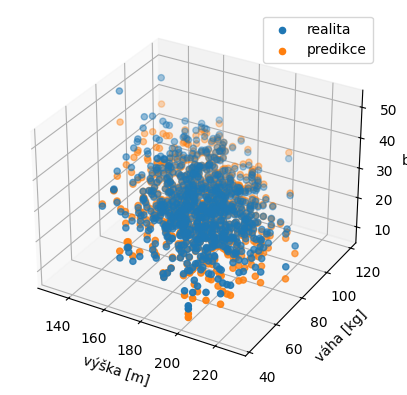

In [4]:
import numpy.linalg as la

%matplotlib inline

#priprava dat pro linearni regresi
y = trenovaci_data['bmi']
X_t = np.array((np.ones(y.shape), trenovaci_data['vyska'], trenovaci_data['vaha']))
X = X_t.transpose()

# sestaveni matice a prave strany
A = X_t @ X # np.dot(X^T,X)
b = X_t @ y
# vypocet koeficientu resenim soustavy lin. rovnic
koeficienty = la.solve(A,b)
bmi_hat_trenovaci = X @ koeficienty # vypocet predikce na trenovacich datech


X_test_t = np.array(( np.ones(len(testovaci_data)),testovaci_data['vyska'], testovaci_data['vaha']))
X_test = X_test_t.transpose()
bmi_hat_testovaci = X_test @ koeficienty

# vykresleni predikce a reality pro trenovaci data
ax = plt.axes(projection = '3d')
ax.scatter3D(trenovaci_data['vyska'], trenovaci_data['vaha'], trenovaci_data['bmi'], label = 'realita');
ax.scatter3D(trenovaci_data['vyska'], trenovaci_data['vaha'], bmi_hat_trenovaci, label = 'predikce');
ax.legend()
ax.set_xlabel('výška [m]')
ax.set_ylabel('váha [kg]')
ax.set_zlabel('bmi')

# vypocet chyby
mse_ls_modelu_trenovaci = ((trenovaci_data['bmi']-bmi_hat_trenovaci)**2).mean()
mse_ls_modelu_testovaci = ((testovaci_data['bmi']-bmi_hat_testovaci)**2).mean()

print(f"Chyba na trenovacich datech {mse_ls_modelu_trenovaci}")
print(f"Chyba na testovacich datech {mse_ls_modelu_testovaci}")


Chyba na trenovacich datech 0.04110284114047577
Chyba na testovacich datech 0.01906909402988357


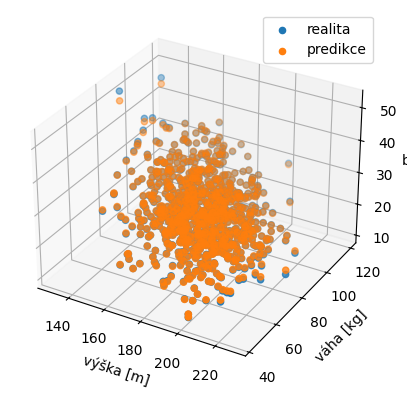

In [5]:
import numpy.linalg as la

%matplotlib inline

#priprava dat pro linearni regresi
y = trenovaci_data['bmi']
X_t = np.array((np.ones(y.shape), trenovaci_data['vyska'], trenovaci_data['vaha'], trenovaci_data['vaha']**2, trenovaci_data['vyska']**2, trenovaci_data['vaha']*trenovaci_data['vyska']))
X = X_t.transpose()

# sestaveni matice a prave strany
A = X_t @ X # np.dot(X^T,X)
b = X_t @ y
# vypocet koeficientu resenim soustavy lin. rovnic
koeficienty = la.solve(A,b)
bmi_hat_trenovaci = X @ koeficienty # vypocet predikce na trenovacich datech


X_test_t = np.array(( np.ones(len(testovaci_data)),testovaci_data['vyska'], testovaci_data['vaha'], testovaci_data['vaha']**2, testovaci_data['vyska']**2, testovaci_data['vaha']*testovaci_data['vyska']))
X_test = X_test_t.transpose()
bmi_hat_testovaci = X_test @ koeficienty

# vykresleni predikce a reality pro trenovaci data
ax = plt.axes(projection = '3d')
ax.scatter3D(trenovaci_data['vyska'], trenovaci_data['vaha'], trenovaci_data['bmi'], label = 'realita');
ax.scatter3D(trenovaci_data['vyska'], trenovaci_data['vaha'], bmi_hat_trenovaci, label = 'predikce');
ax.legend()
ax.set_xlabel('výška [m]')
ax.set_ylabel('váha [kg]')
ax.set_zlabel('bmi')

# vypocet chyby
mse_ls_modelu_trenovaci = ((trenovaci_data['bmi']-bmi_hat_trenovaci)**2).mean()
mse_ls_modelu_testovaci = ((testovaci_data['bmi']-bmi_hat_testovaci)**2).mean()

print(f"Chyba na trenovacich datech {mse_ls_modelu_trenovaci}")
print(f"Chyba na testovacich datech {mse_ls_modelu_testovaci}")


Optimální situace je taková, že na obou datových množinách je situace z hlediska chyby obdobná. Pokud je na testovací množině chyba výrazně horší než na trénovací množině, tak model se sice dokáže naučit na daných datech, ale hůře zobecňuje (generalizuje), tj. má problémy na neznámých datech. Pro toto hodnocení je ovšem nutné zaručit, že prvky v obou množinách mají obdobné statistické vlastnosti (průměr, rozptyl, atd.), např. že se nám nestalo to, že v tréninkových datech budou silně dominovat lidé s vyšším bmi, výškou, vahou než v testovacích datech.

Když se podíváme na distribuci chyby na tréninkových datech  níže, tak lze vidět, že model hůře předpovídá bmi pro lidi, kteří mají nízkou výšku a mají velkou váhu a obráceně, velké lidi s malou vahou. Což je dáno tím, že náš model je lineární (použit je lineární funkce), zatímco jak víme, bmi je nelineární.

Text(0.5, 0, 'odchylka v bmi')

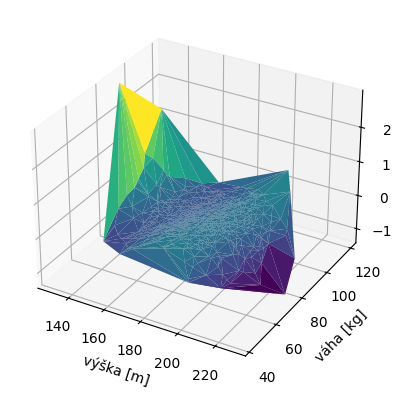

In [6]:
ax = plt.axes(projection="3d")
ax.plot_trisurf(
    trenovaci_data["vyska"],
    trenovaci_data["vaha"],
    trenovaci_data["bmi"] - bmi_hat_trenovaci,
    cmap="viridis",
    edgecolor="none",
)
ax.set_xlabel("výška [m]")
ax.set_ylabel("váha [kg]")
ax.set_zlabel("odchylka v bmi")

**Úkoly pro samostatnou činnost:**


*   Vykreslete výše uvedené grafy i pro testovací data.




#### Regrese pomocí stromů (lesů)

Nevýhodou výše uvedeného postupu je to, že musíme explicitně odhadnout matematický model. Když bude sestaven nevhodně, viz výše, tak nebudeme dostávat dobré výsledky. Musíme mít tedy jisté povědomí o problému. Existují však techniky kdy, můžeme vyjít pouze z informací obsažených v datech. Příkladem  je použití [stromů](https://en.wikipedia.org/wiki/Decision_tree_learning) ať už rozhodovacích, či regresních. Konkrétně budeme používat jistou množinu regresních stromů (les) a výsledná předpověď je složená z předpovědí dílčích. Berme to jako ilustraci různých možností strojového učení.

V ekosystému pro Python je velká řada technik již implementována v knihovně  [scikit-learn](https://scikit-learn.org/stable/). Jedním z cílů tohoto kurzu je ukázat si aplikaci této knihovny. V reálné situaci tak použijete již implementovaný algoritmus, např. zde jsou to v podstatě dva řádky kódu.


Chyba na trenovacich datech 0.07402256138535432
Chyba na testovacich datech 0.23394162250448886


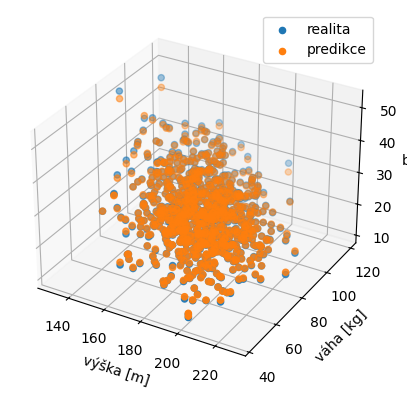

In [7]:
from sklearn.ensemble import RandomForestRegressor

# sestavení regresorů z trénovacích dat
X = np.array((trenovaci_data["vyska"], trenovaci_data["vaha"])).transpose()
y = trenovaci_data["bmi"]
# vytvoření a naučení modelu - celá věda je toto
model = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=0)
model.fit(X, y)
# predikce modelu - aplikace
bmi_hat_trenovaci = model.predict(X)
bmi_hat_testovaci = model.predict(
    np.array((testovaci_data["vyska"], testovaci_data["vaha"])).transpose()
)

# vykresleni predikce a reality pro trenovaci data
ax = plt.axes(projection="3d")
ax.scatter3D(
    trenovaci_data["vyska"],
    trenovaci_data["vaha"],
    trenovaci_data["bmi"],
    label="realita",
)
ax.scatter3D(
    trenovaci_data["vyska"], trenovaci_data["vaha"], bmi_hat_trenovaci, label="predikce"
)
ax.legend()
ax.set_xlabel("výška [m]")
ax.set_ylabel("váha [kg]")
ax.set_zlabel("bmi")

# vypocet chyby
mse_ls_modelu_trenovaci = ((trenovaci_data["bmi"] - bmi_hat_trenovaci) ** 2).mean()
mse_ls_modelu_testovaci = ((testovaci_data["bmi"] - bmi_hat_testovaci) ** 2).mean()

print(f"Chyba na trenovacich datech {mse_ls_modelu_trenovaci}")
print(f"Chyba na testovacich datech {mse_ls_modelu_testovaci}")

Predikce modelu při daných parametrech je z hlediska MSE lepší. Podobně i distribuce chyby v příznakovém prostoru je lepší, tedy model dokáže lépe předpovídat jak malé a těžké jedince, tak i velké a lehké jedince.

Parametry modelu se nazývají *hyperparametry* modelu a obvykle se musí šikovně nastavit, viz úkol pro samostatnou činnost.

Text(0.5, 0, 'odchylka v bmi')

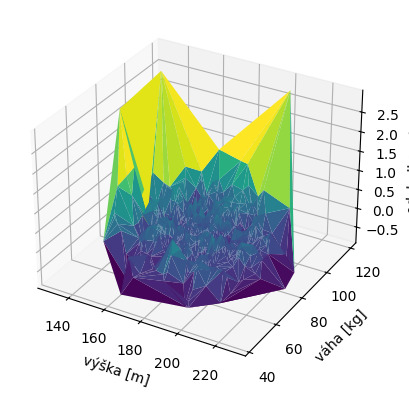

In [8]:
ax = plt.axes(projection="3d")
ax.plot_trisurf(
    trenovaci_data["vyska"],
    trenovaci_data["vaha"],
    trenovaci_data["bmi"] - bmi_hat_trenovaci,
    cmap="viridis",
    edgecolor="none",
)
ax.set_xlabel("výška [m]")
ax.set_ylabel("váha [kg]")
ax.set_zlabel("odchylka v bmi")

**Úkoly pro samostatnou činnost:**


*   Vyzkoušejte si jak různé hodnoty hyperparametrů ovlivňují chování modelu, viz [manuál](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

### Klasifikace

Zde si zkusíme klasifikovat jedince do několika kategorií na základě BMI. V případě že rozdělujeme data do dvou tříd, tak mluvíme o tzv. *binární klasifikaci*, jinak o klasifikaci do více tříd.

Připravíme si data následovně:


*   $BMI < 18$, podváha, kategorie 0
*   $BMI \in <18,25>$, normální váha, kategorie 1
*   $BMI > 25$, nadváha, kategorie 2

Každý jedinec tak bude právě v jedné z těchto tří kategorií. Nejprve si tedy vezmeme naše data a na základě BMI jim dodáme štítek, tzv. *label*, tedy číslo kategorie.

Poznámka:
V dalším si ukážeme i úlohy, kde daná entita může být ve více kategoriích.



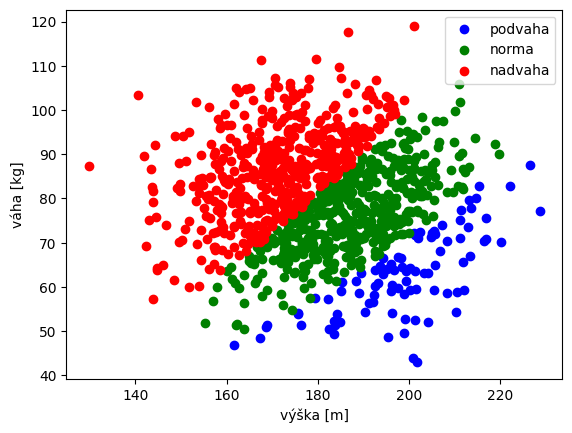

In [9]:
def label_dle_bmi(bmi):
  """
  Prirazuje label dle dane hodnoty bmi.
  Pouziti pro vytvoreni labelu.
  """
  if bmi < 18:
    return 0
  elif bmi <= 25:
    return 1
  else:
    return 2


df = pd.read_csv('data_lide.csv')# nacti ulozena data
labels = [ label_dle_bmi(bmi) for bmi in df['bmi'] ] # vytvor si seznam labelu
df.insert(3, 'label', labels) # vloz to tam
df.head()

# todo kresleni scatter labelu
%matplotlib inline
bmi_nizke = df[ df['label'] == 0]
bmi_normalni = df[ df['label'] == 1]
bmi_vysoke = df[ df['label'] == 2]
plt.scatter(bmi_nizke['vyska'], bmi_nizke['vaha'], color = 'b',label = 'podvaha')
plt.scatter(bmi_normalni['vyska'], bmi_normalni['vaha'], color = 'g', label = 'norma')
plt.scatter(bmi_vysoke['vyska'], bmi_vysoke['vaha'], color = 'r', label='nadvaha')
plt.xlabel('výška [m]')
plt.ylabel('váha [kg]')
plt.legend()
plt.show()


Opět si data rozdělíme na trénovací a testovací, viz následující ukázka kódu. Zatím to děláme tímto naivním způsobem, ale v dalších hodinách si ukážeme i použití pokročilejších nástrojů z knihovny *scikit-learn*.

In [10]:
promichano_index = df.index.to_list()
np.random.shuffle(promichano_index)

trenovaci_data_velikost = int(len(df) * 0.80)  # vezmeme 80 % pro nauceni modelu
print(df.index[10])
trenovaci_data = df.filter(
    promichano_index[:trenovaci_data_velikost], axis=0
)  # vem nahodne indexy
testovaci_data = df.filter(
    promichano_index[trenovaci_data_velikost:], axis=0
)  # vem nahodne indexy

10


#### Klasifikace pomocí metody KNN

Metoda [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (K-Nearest Neighbors) používá pro klasifikaci poměrně jednoduchého principu, kde při klasifikaci určíme *k* nejbližších sousedů a na výsledné určení třídy se použije ta třída, která v nejbližších sousedech převládá, více viz obrázek níže. Detaily si ukážeme v budoucnu. Nyní jen jednoduchý princip naivní implementace algoritmu.

Všimněte si, že data nijak neupravujeme a osy pak mají rozdílné měřítko. Vede to k tomu, že změna např. o 10 jednotek je v různých směrech různě významná.
Pro celou řadu algoritmů je nutné před jejich použitím data upravit tak, aby data měla stejné měřítko např. pomocí *standardizace*, *škálování* viz dále.

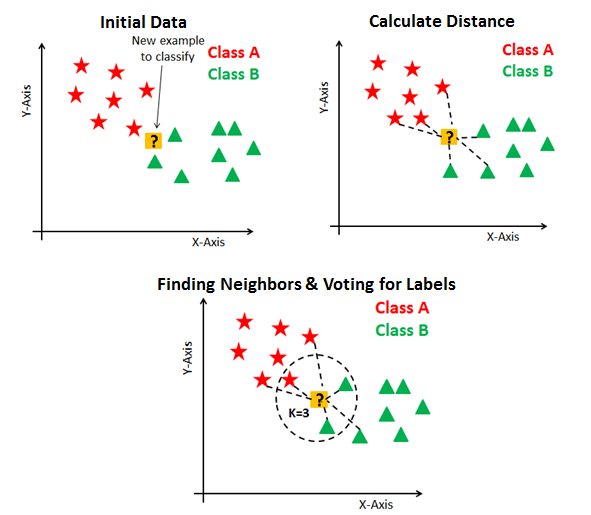

Zdroj obrázku http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png

In [ ]:
def knn_klasifikuj(X, y, x, k=3):
    """
    :param X: vstupni matice prvku, kazdy radek je jeden zaznam - trenovaci data
    :param y: labely trenovacich dat
    :param x: prvek ktery chceme klasifikovat
    :param k: počet sousedů
    :return: cislo tridy
    """

    def vzdalenost(x, y):
        return np.sum((x - y) ** 2)

    # urceni tabulky vzdalenosti - ulozime vzdalenost od x a label pro kazdy prvek z X
    tabulka = np.array([(vzdalenost(x, radek), label) for radek, label in zip(X[:], y)])
    # nalezeni k-nejblizsich prvku. Podobny algoritmus jako pro selection sort.
    for krok in range(k):
        index = np.argmin(tabulka[krok:, 0], axis=0) + krok
        tabulka[[krok, index]] = tabulka[[index, krok]]
    # urceni cetnosti labelu pro k nejblizsich sousedu - prvnich k v tabulce
    cetnosti = {}
    for label in tabulka[:k, 1]:  # jed jen pres sloupecek labelu
        if label in cetnosti:
            cetnosti[label] += 1
        else:
            cetnosti[label] = 1
    # vrat klic prislusejici nejcetnejsi hodnote
    return int(sorted(cetnosti.items(), key=lambda kv: kv[1])[-1][0])


# priprava dat pro KNN - potrebujeme priznaky vyska a vaha a na zaklade toho urcujeme label
y = trenovaci_data["label"]
X = np.array((trenovaci_data["vyska"], trenovaci_data["vaha"])).transpose()
predikce_trenovaci_data = [knn_klasifikuj(X, y, prvek) for prvek in X]


# urceni barvy - nejprve nakreslim vsechny body. Poté černě označím ty špatně určené.
barvy = []
chyby = []
label_na_barvu = {0: "blue", 1: "green", 2: "red"}
for index, (realita, predikce) in enumerate(
    zip(trenovaci_data["label"], predikce_trenovaci_data)
):
    barvy.append(label_na_barvu[realita])
    if realita != predikce:
        chyby.append(True)
    else:
        chyby.append(False)

# vyber si jen ty spatne urcene
spatne_urceno = trenovaci_data[chyby]
print(f"Spatne urceno {len(spatne_urceno)} polozek")

# vykresli trenovaci data
plt.scatter(
    trenovaci_data["vyska"],
    trenovaci_data["vaha"],
    color=barvy,
    label="Trenovaci data - realita",
)
plt.scatter(
    spatne_urceno["vyska"], spatne_urceno["vaha"], color="black", label="Spatne urceno"
)
plt.legend()
plt.show()

Zde jsme pouze vykreslili body, které jsou špatně oklasifikované. Vidíme, že se jedná o body na hranicích tříd.

Určitě by šlo lépe rozklíčovat chybu klasifikace v jednotlivých třídách pomocí *matice záměn* a dále vyhodnotit úspěšnost klasifikace pomocí různých *klasifikačních metrik*.

**Úkoly pro samostatnou práci**

1.   Ověřte chování na testovacích datech.
2.   Ověřte chování algoritmu při škálování hodnot váhy a výšky na interval $<0,1>$.



#### Klasifikace pomocí klasifikačního stromu

Ukážeme si ještě použití klasifikačních stromů. Detaily si uvedeme až v dalších lekcích.

Spatne urceno 0 polozek


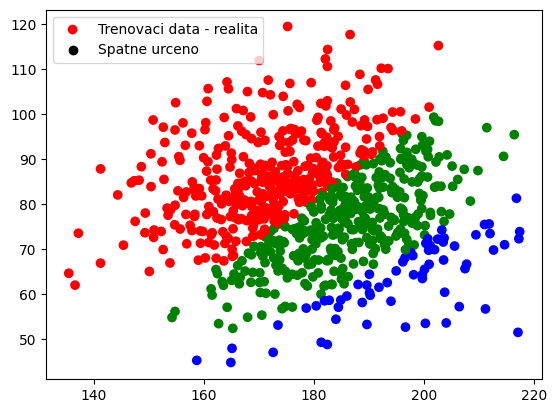

In [ ]:
# pouziti klasifikacniho stromu
from sklearn import tree

# vytvoreni dat pro nakrmeni algoritmu
X = np.array((trenovaci_data["vyska"], trenovaci_data["vaha"])).transpose()
y = trenovaci_data["label"]

# pouziti modelu rozhodovaciho stromu
model = tree.DecisionTreeClassifier()
model.fit(X, y)
predikce_trenovaci_data = model.predict(X)  # ověření na trénovacích datech

# urceni barvy - nejprve nakreslim vsechny body. Poté černě označím ty špatně určené.
barvy = []
chyby = []
label_na_barvu = {0: "blue", 1: "green", 2: "red"}
for index, (realita, predikce) in enumerate(
    zip(trenovaci_data["label"], predikce_trenovaci_data)
):
    barvy.append(label_na_barvu[realita])
    if realita != predikce:
        chyby.append(True)
    else:
        chyby.append(False)

# vyber si jen ty spatne urcene
spatne_urceno = trenovaci_data[chyby]
print(f"Spatne urceno {len(spatne_urceno)} polozek")

plt.scatter(
    trenovaci_data["vyska"],
    trenovaci_data["vaha"],
    color=barvy,
    label="Trenovaci data - realita",
)
plt.scatter(
    spatne_urceno["vyska"], spatne_urceno["vaha"], color="black", label="Spatne urceno"
)
plt.legend()
plt.show()

**Úkoly pro samostatnou práci**

1.   Ověřte chování na testovacích datech.
2.   Ověřte chování algoritmu při škálování hodnot váhy a výšky na interval $<0,1>$.

### Shlukování (clustering)

V dalším předpokládejme, že máme neznámá data a chceme určit, kolik by se v nich mohlo nacházet tříd, viz obrázek níže. Zde pro jednoduchost předpokládejme, že máme k dispozici váhu a výšku skupiny lidí (muži a ženy) a zkusíme dané shluky detekovat za použití nejjednoduššího shlukovacího algoritmu [K-means](https://cs.wikipedia.org/wiki/K-means). Detaily a možnou implementaci si ukážeme v dalších hodinách, zde opět využijeme knihovnu *sklearn*.


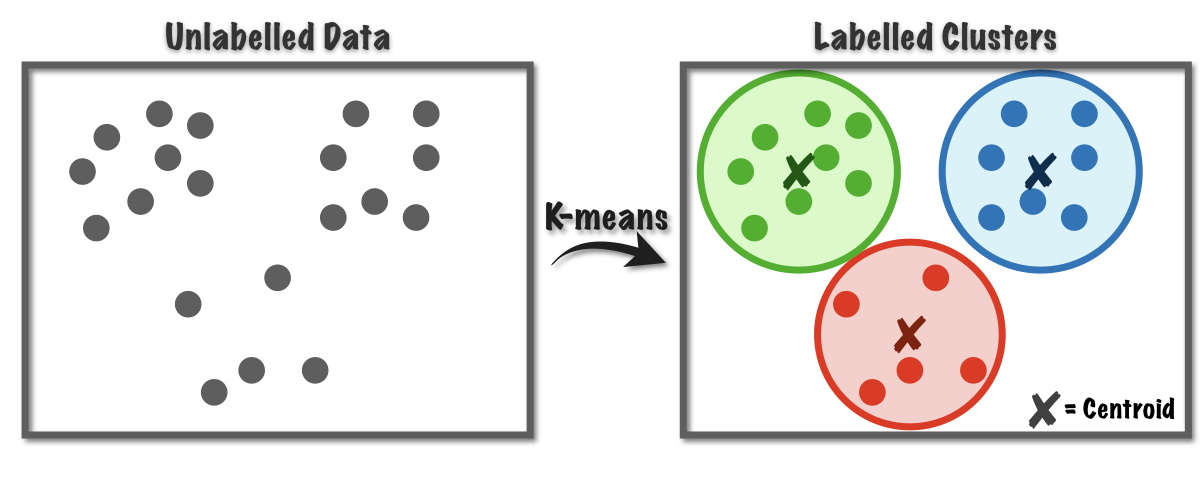

Zdroj obrázku https://miro.medium.com/max/1200/1*rw8IUza1dbffBhiA4i0GNQ.png

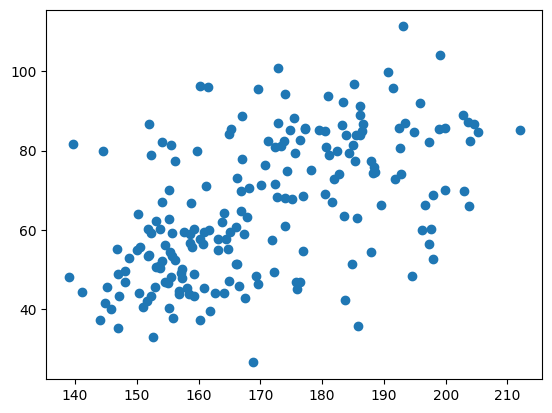

In [ ]:
# generovani dat, tak aby vytvorily dve skupiny
muzi_vaha = generuj_vahu(kolik=100)
zeny_vaha = generuj_vahu(vaha_prumer=50, vaha_sigma=10, kolik=100)

muzi_vyska = generuj_vysku(kolik=100)
zeny_vyska = generuj_vysku(vyska_prumer=160, vyska_sigma=10, kolik=100)

vaha = np.append(muzi_vaha, zeny_vaha, axis=0)
vyska = np.append(muzi_vyska, zeny_vyska, axis=0)
X = np.array((vaha, vyska)).transpose()

# pouziti algoritmu k-means
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=0).fit(X)  # nafituj
barvy = [
    "red" if item == 0 else "blue" for item in model.labels_
]  # podle urcenych labelu obarvi

plt.scatter(vyska, vaha)
plt.show()

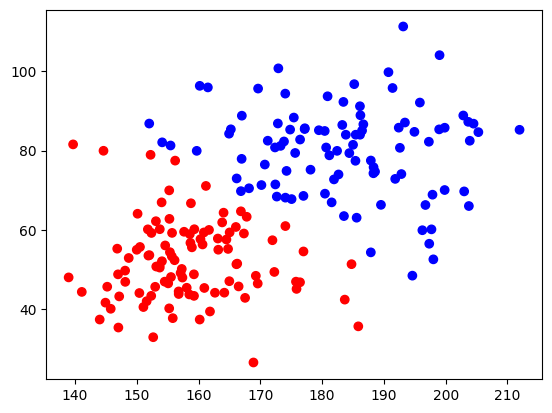

In [ ]:
plt.scatter(vyska, vaha, color=barvy, label="Nalezene skupiny")
plt.show()

Ve výše uvedeném kódu je použit algoritmus K-means, kde jako jeden z parametrů je odhadovaný počet klusterů (skupin). Algoritmus rozděluje data tak, aby je optimálně rozdělil do dvou skupin.

Všimněte si, že v metodě *fit* nepoužíváme *label* ($y$), ale algoritmus je datům právě přiřadí na základě jejich distribuce v příznakovém prostoru. Z obrázku je patrné, že zde opravdu jsou dva shluky.

**Úkoly pro samostatnou práci**

1.   Upravte program tak, aby data rozdělil do tří skupin a následně je vizualizoval.
2.   Seznamte se s funkcí [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)  a použijte ji pro vygenerování alespoň dvou datových sad z různými statistickými vlastnostmi.


## Druhy učení

Předpokládejme, že máme k dispozici data, která využijeme k vytvoření modelu.
Na model se zde budeme dívat jako na nějakou krabičku (*black box*), která má svůj vnitřní stav, což je množina nějakých vnitřních parametrů.
Učením modelu pak rozumíme nastavení vnitřních parametrů modelu. V zásadě lze modely rozdělit do dvou základních skupin (vynecháváme  *reinforcement learning*), viz obrázek níže.

*   Učení s učitelem (*supervised learning*) - zde je součástí dat i výstup modelu. Měníme vnitřní parametry modelu tak, abychom dostali očekávaný výstup. Příkladem jsou rozhodovací stromy.
*   Učení bez učitele (*unsupervised learning*) - zde necháváme na modelu, aby našel nějakou strukturu v datech sám, informace např. do které třídy patří nejsou k dispozici. Příkladem je výše uvedený algoritmus K-means, který data sám rozdělil do dvou skupin. Algoritmu nebylo známo, do které skupiny data patří.

 Toto rozdělení je pouze základní, protože třeba algoritmus K-NN je těžké do výše uvedených typů učení vůbec zařadit. Sice jsme použili labely vzorů ke klasifikaci, ale je otázkou, zda se jedná vůbec o učení, neboť se nemění žádné vnitřní parametry modelu.

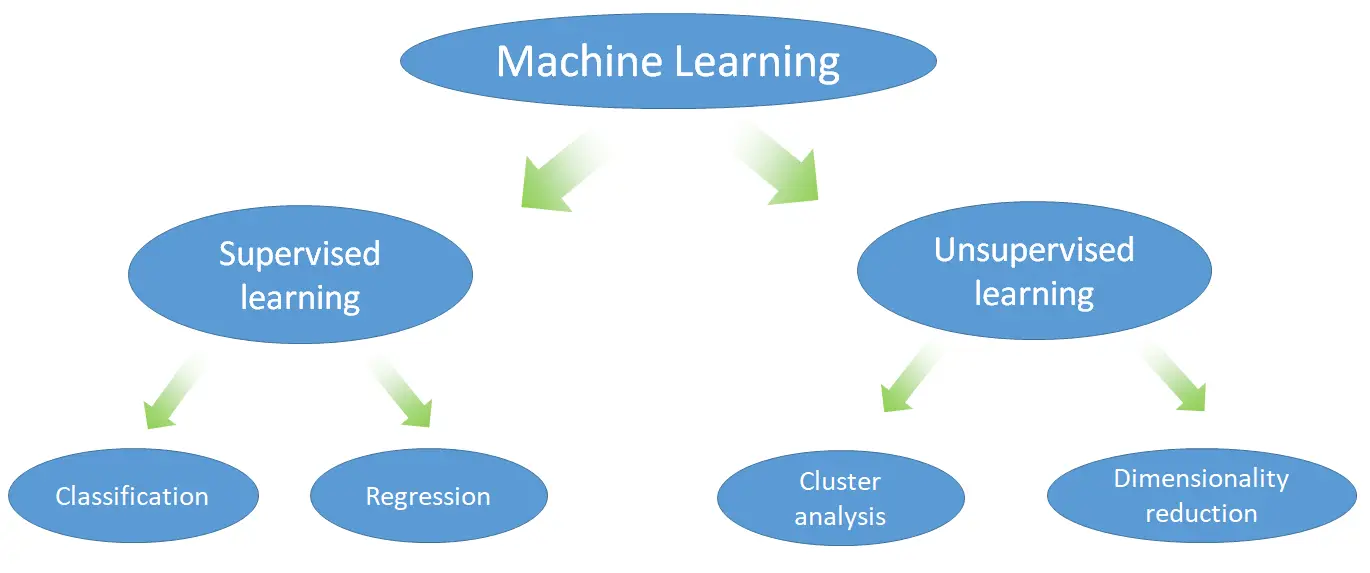

Zdroj obrázku https://www.diegocalvo.es/wp-content/uploads/2018/09/machine-learning-classification.png

## Učení a data

Učení modelů obvykle probíhá tak, že se data, která máme k dispozici rozdělí na tři části - trénovací, validační a testovací.


*   Trénovací data jsou obvykle nejrozsáhlejší a na nich je model naučen.
*   Validační data - řada modelů strojového učení obvykle závisí na parametrech modelu (hyperparametry). Tyto data se používají pro optimální nastavení hyperparametrů.
*   Testovací data - na těchto datech je ověřeno a ohodnoceno chování modelu.

Jednotlivé datové množiny by měly mít co nejvíce podobné vlastnosti z hlediska relavantních informací pro algoritmus. Rozmyslete si chování výše uvedených algoritmů, kdyby trénovací množina při klasifikaci obsahovala jen prvky z jedné skupiny.

# Literatura:
1) [Blog](https://sebastianraschka.com/blog/2021/ml-course.html) autora knihy [Python Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition):

RASCHKA, Sebastian a Vahid MIRJALILI. Python machine learning: machine learning
and deep learning with Python, scikit-learn, and TensorFlow. Birmingham: Pack pub-
lishing, 2017. ISBN 978-1-78712-593-3.

2)  Pro čtenáře s hlubším zájmem je k dispozici sbírka výukových materiálů ke knize [An Introduction to Statistical Learning](https://www.statlearning.com/) včetně
knihy samotné:

JAMES, Gareth, Daniela WITTEN, Trevor HASTIE a Robert TIBSHIRANI. An introduction to statistical learning: with applications in R. New York: Springer, [2013]. Springer texts in statistics, 103. ISBN 978-1461471370.

